In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
dataset = pd.read_csv('vehicle.csv')

In [3]:
dataset.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
dataset.shape

(846, 19)

In [0]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [0]:
dataset.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [0]:
dataset['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [0]:
dataset.groupby('class').size()

class
bus    218
car    429
van    199
dtype: int64

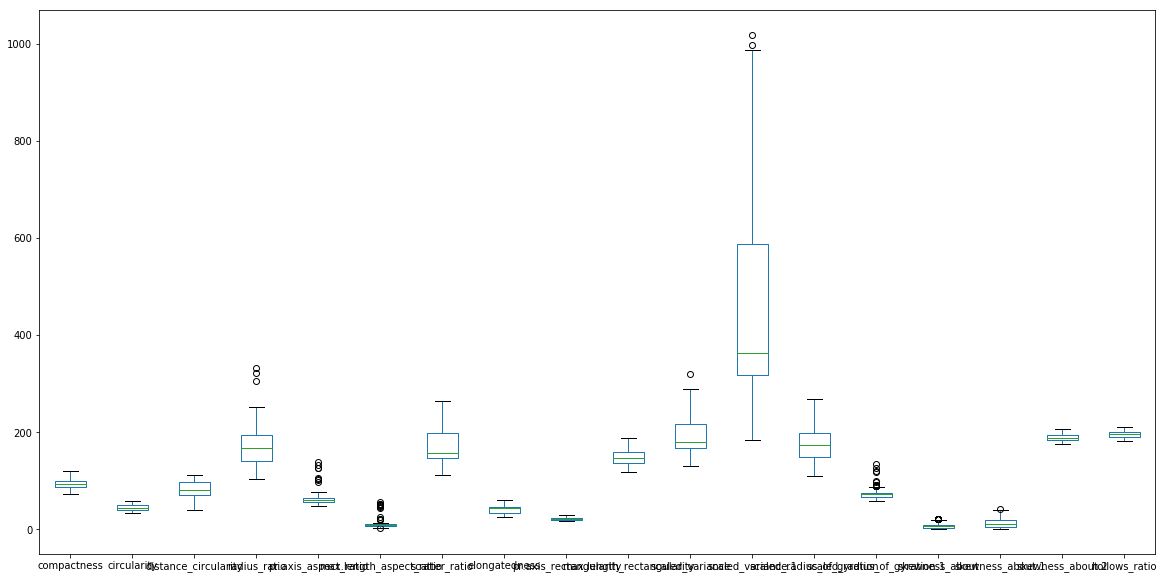

In [0]:
dataset.plot(kind='box', figsize=(20,10))
plt.show()

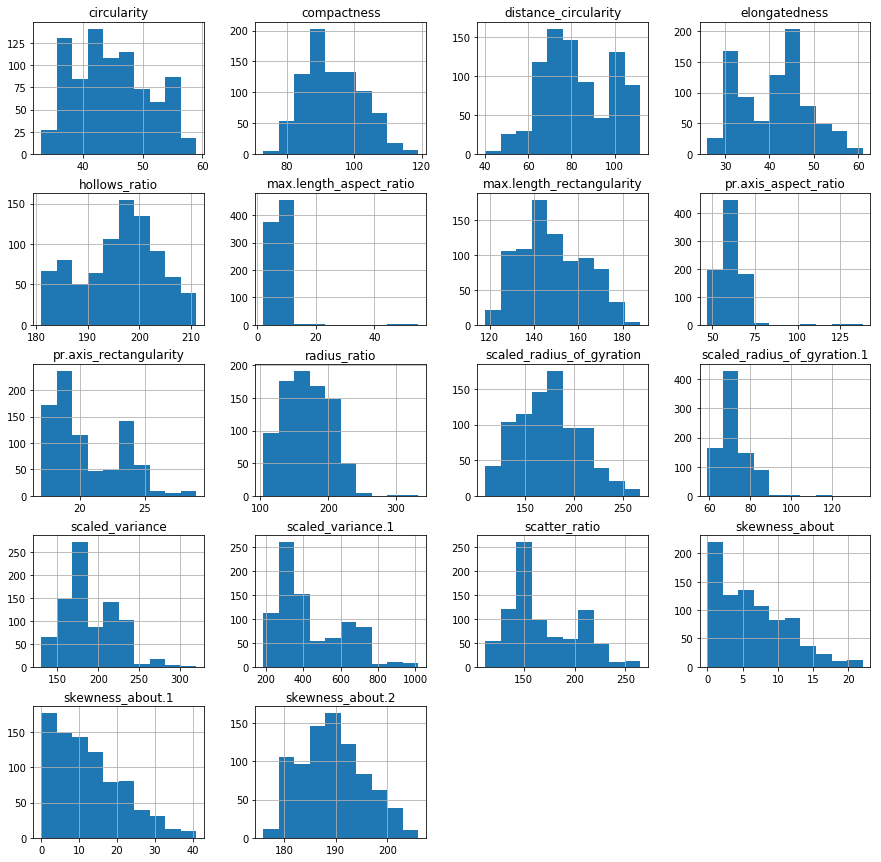

In [0]:
dataset.hist(figsize=(15,15))
plt.show()

In [0]:
dataset.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [0]:
for i in dataset.columns[:-1]:
    median_value = dataset[i].median()
    dataset[i] = dataset[i].fillna(median_value)

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [0]:
for col_name in dataset.columns[:-1]:
    q1 = dataset[col_name].quantile(0.25)
    q3 = dataset[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    dataset.loc[ (dataset[col_name] < low) | (dataset[col_name] > high), col_name] = dataset[col_name].median()
    

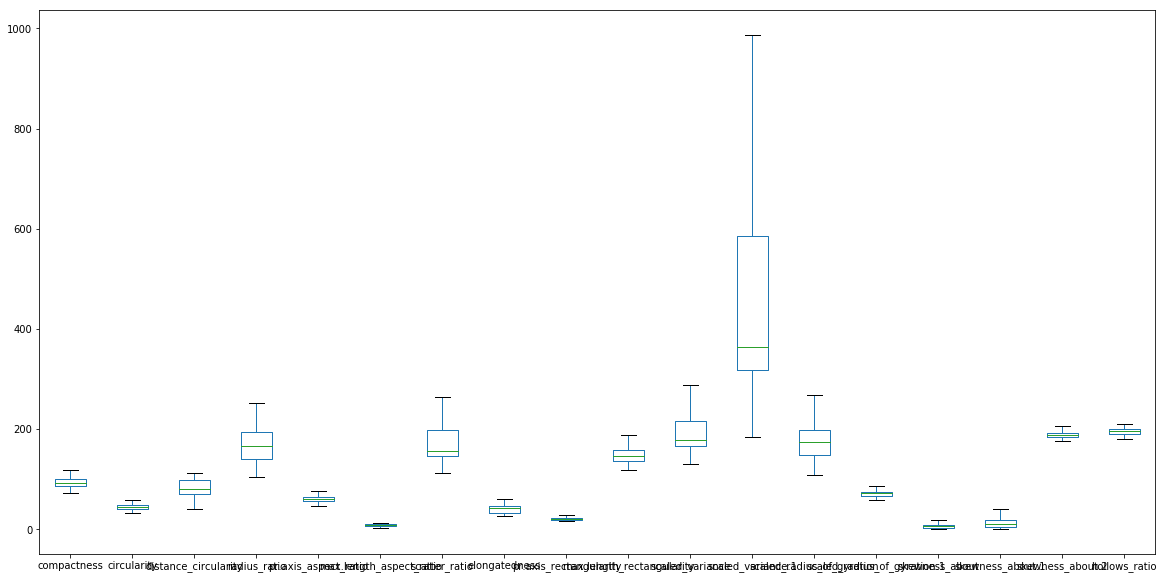

In [0]:
dataset.plot(kind='box', figsize=(20,10))

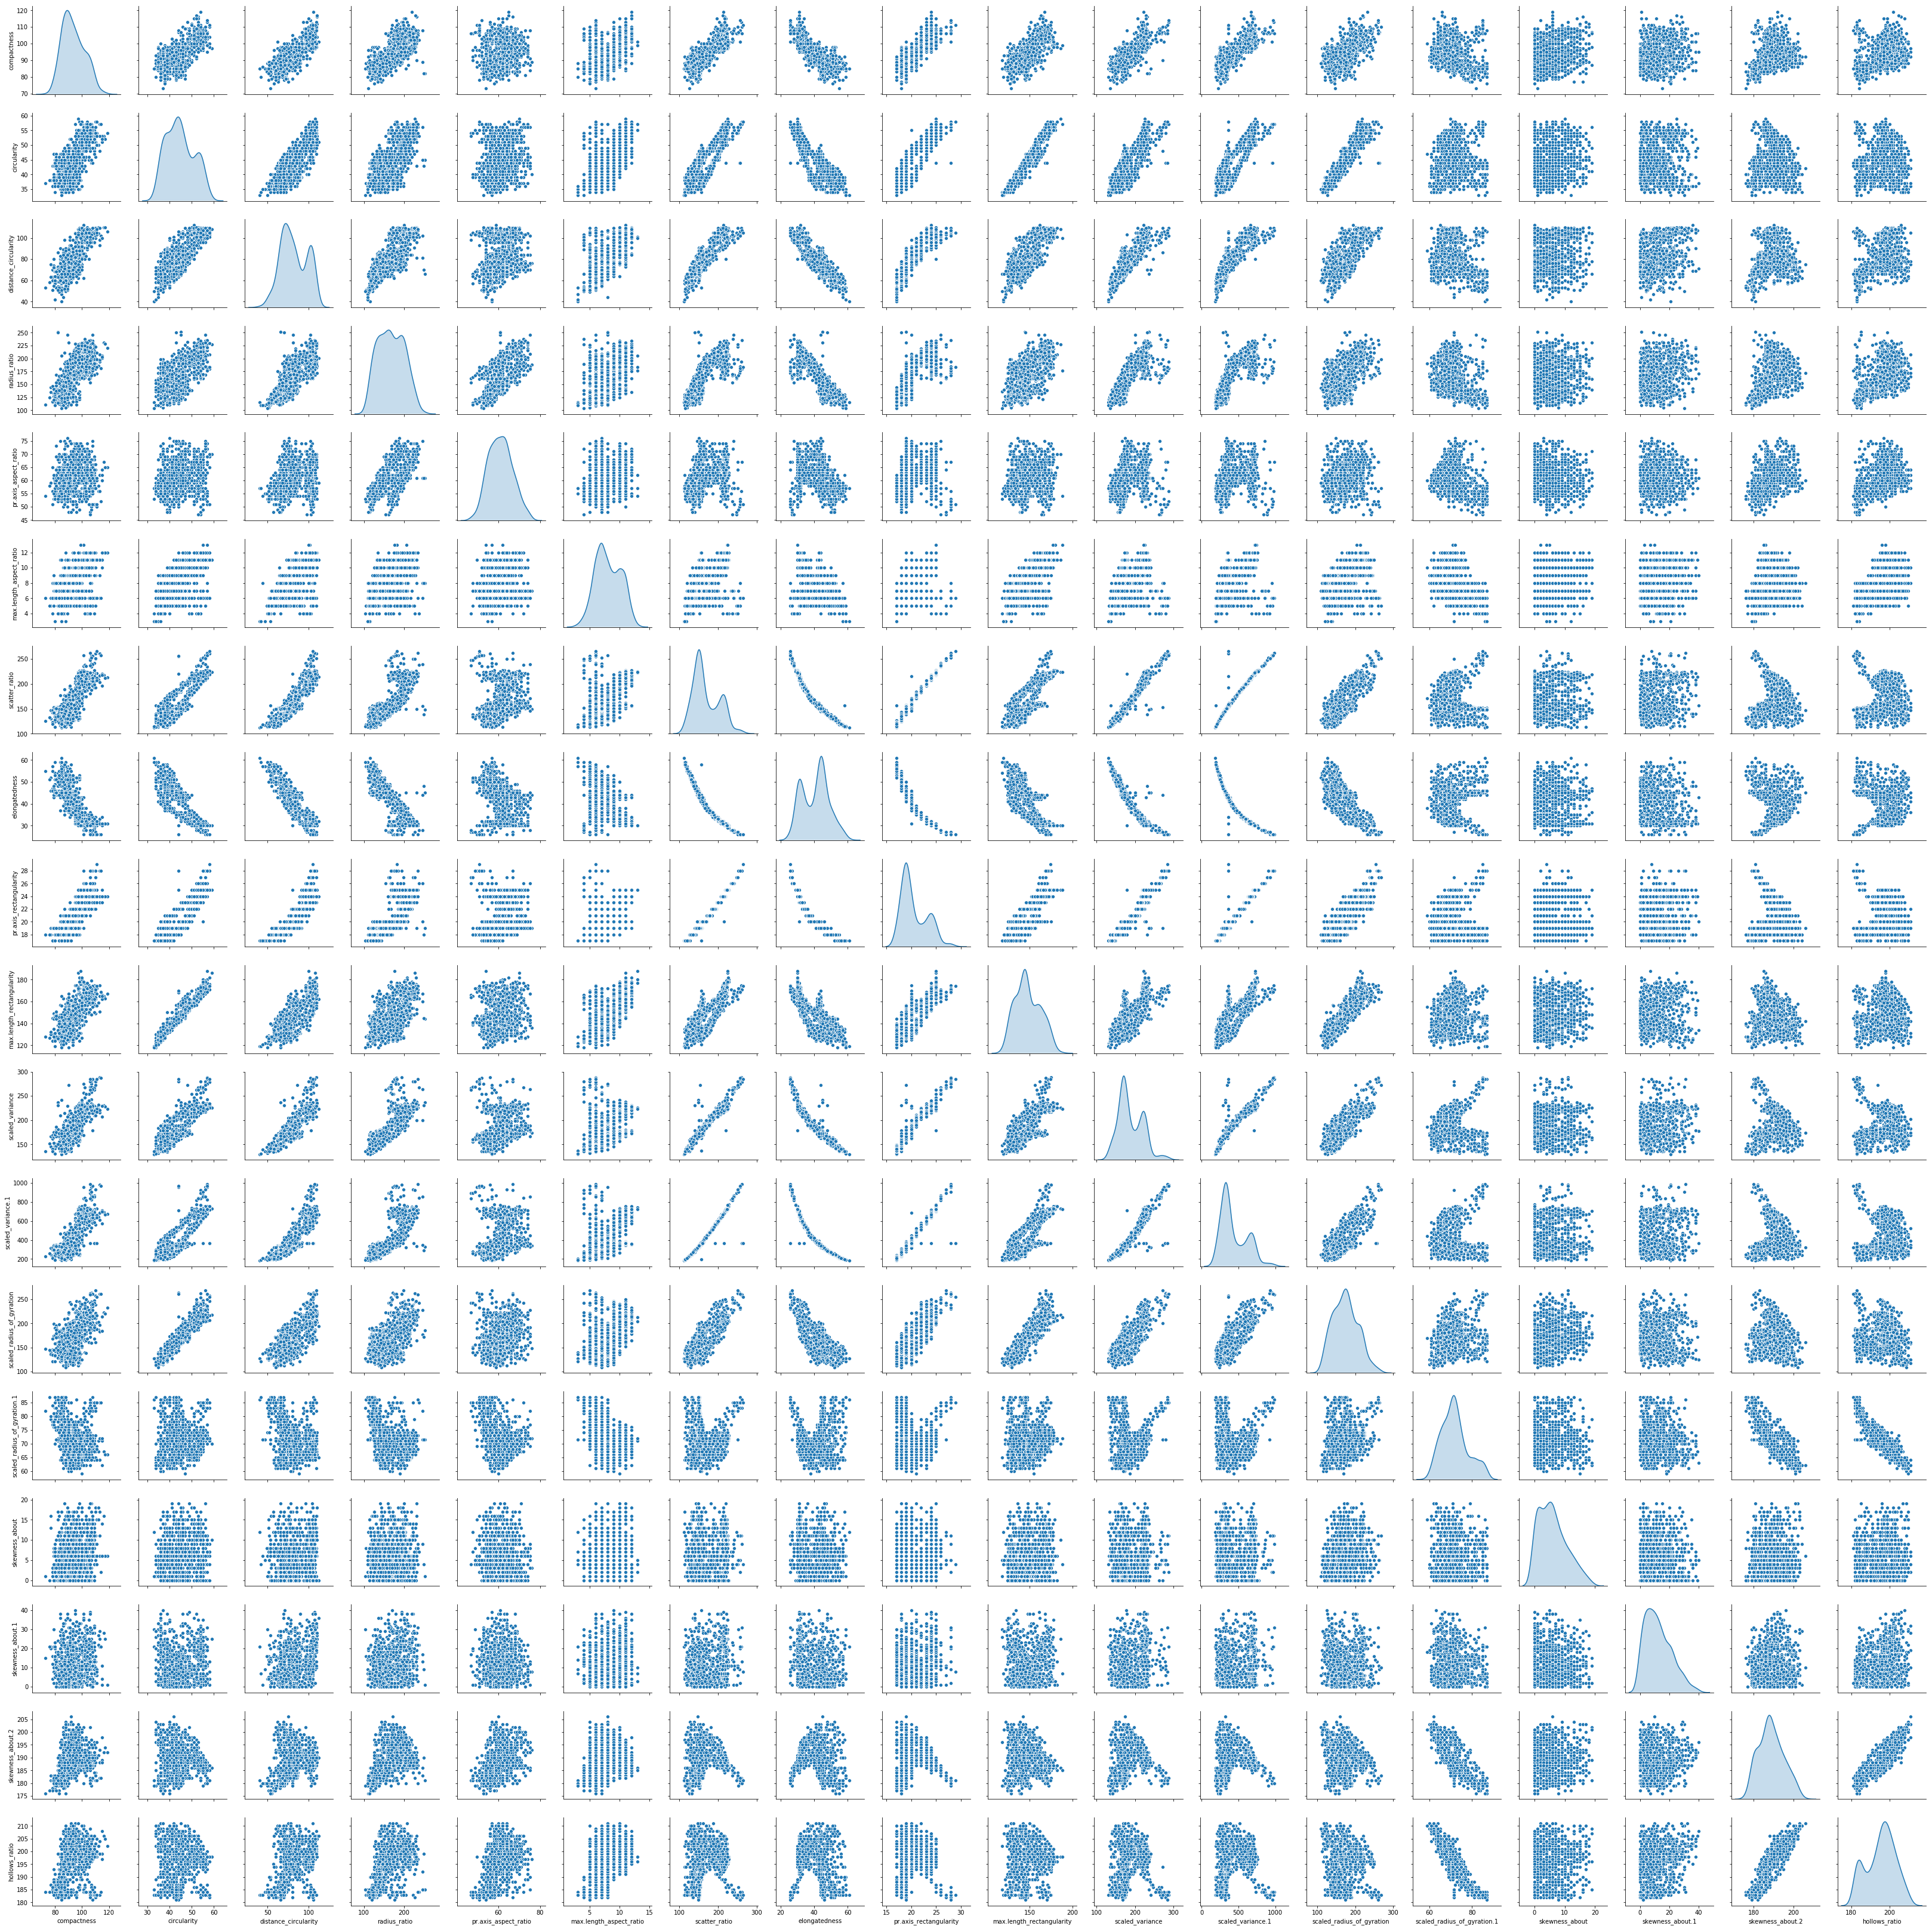

In [0]:
sns.pairplot(dataset,diag_kind='kde')

In [0]:
dataset.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.684887,0.789928,0.721925,0.192864,0.499928,0.812620,-0.788750,0.813694,0.676143,0.769871,0.806170,0.585243,-0.246681,0.197308,0.156348,0.298537,0.365552
circularity,0.684887,1.000000,0.792320,0.638280,0.203253,0.560470,0.847938,-0.821472,0.843400,0.961318,0.802768,0.827462,0.925816,0.068745,0.136351,-0.009666,-0.104426,0.046351
distance_circularity,0.789928,0.792320,1.000000,0.794222,0.244332,0.666809,0.905076,-0.911307,0.893025,0.774527,0.869584,0.883943,0.705771,-0.229353,0.099107,0.262345,0.146098,0.332732
radius_ratio,0.721925,0.638280,0.794222,1.000000,0.650554,0.463958,0.769941,-0.825392,0.744139,0.579468,0.786183,0.760257,0.550774,-0.390459,0.035755,0.179601,0.405849,0.491758
pr.axis_aspect_ratio,0.192864,0.203253,0.244332,0.650554,1.000000,0.150295,0.194195,-0.298144,0.163047,0.147592,0.207101,0.196401,0.148591,-0.321070,-0.056030,-0.021088,0.400882,0.415734
max.length_aspect_ratio,0.499928,0.560470,0.666809,0.463958,0.150295,1.000000,0.490759,-0.504181,0.487931,0.642713,0.401391,0.463249,0.397397,-0.335444,0.081898,0.141664,0.083794,0.413174
scatter_ratio,0.812620,0.847938,0.905076,0.769941,0.194195,0.490759,1.000000,-0.971601,0.989751,0.809083,0.960883,0.980447,0.799875,0.011314,0.064242,0.211647,0.005628,0.118817
elongatedness,-0.788750,-0.821472,-0.911307,-0.825392,-0.298144,-0.504181,-0.971601,1.000000,-0.948996,-0.775854,-0.947644,-0.948851,-0.766314,0.078391,-0.046943,-0.183642,-0.115126,-0.216905
pr.axis_rectangularity,0.813694,0.843400,0.893025,0.744139,0.163047,0.487931,0.989751,-0.948996,1.000000,0.810934,0.947329,0.973606,0.796690,0.027545,0.073127,0.213801,-0.018649,0.099286
max.length_rectangularity,0.676143,0.961318,0.774527,0.579468,0.147592,0.642713,0.809083,-0.775854,0.810934,1.000000,0.750222,0.789632,0.866450,0.053856,0.130702,0.004129,-0.103948,0.076770


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(dataset.drop(columns = 'class'))

In [0]:
X = scaled_df
y = dataset['class']

X_train, X_test, Y_train, Y_test = train_test_split(X,y, random_state = 10)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((634, 18), (212, 18), (634,), (212,))

In [0]:
# Training an SVC using the actual attributes(scaled)

model = SVC(gamma = 'auto')

model.fit(X_train,Y_train)

score_using_actual_attributes = model.score(X_test, Y_test)

print(score_using_actual_attributes)

0.9575471698113207


In [0]:
model = SVC()

params = {'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf'], 'gamma' : ['auto', 'scale' ]}

model1 = GridSearchCV(model, param_grid=params, verbose=5)

model1.fit(X_train, Y_train)

print("Best Hyper Parameters:\n", model1.best_params_)

C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.01, gamma=auto, kernel=linear ...............................
[CV] ... C=0.01, gamma=auto, kernel=linear, score=0.863, total=   0.0s
[CV] C=0.01, gamma=auto, kernel=linear ...............................
[CV] ... C=0.01, gamma=auto, kernel=linear, score=0.853, total=   0.0s
[CV] C=0.01, gamma=auto, kernel=linear ...............................
[CV] ... C=0.01, gamma=auto, kernel=linear, score=0.853, total=   0.0s
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=auto, kernel=rbf, score=0.505, total=   0.0s
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=auto, kernel=rbf, score=0.507, total=   0.0s
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=auto, kernel=rbf, score=0.507, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] .. C=0.01, 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.7s finished


In [0]:
model = SVC(C=1, kernel="rbf", gamma='auto')

scores = cross_val_score(model, X, y, cv=10)

CV_score = scores.mean()
print(CV_score)

0.9574759171961466


Let's create Principle Components out of the attributes

[0.54099325 0.72692428 0.7930894  0.85600489 0.90505781 0.94202882
 0.95968297 0.97234461 0.97961482 0.98404634 0.98811919 0.99170474
 0.99393237 0.99572335 0.9973544  0.99861405 0.99971351 1.        ]


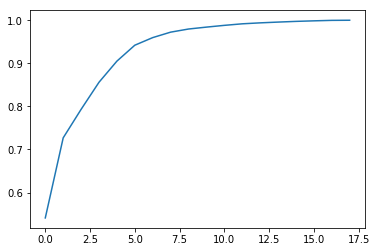

In [0]:
from sklearn.decomposition import PCA

pca = PCA().fit(scaled_df)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(np.cumsum(pca.explained_variance_ratio_))

Let's pick 8 PCs as the first 8 capture more than 95% of the variance in the data

In [0]:
pca = PCA(n_components=8)

X = pca.fit_transform(scaled_df)
Y = dataset['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((634, 8), (212, 8), (634,), (212,))

In [0]:
# Training an SVC using the PCs instead of the actual attributes 
model = SVC(gamma= 'auto')

model.fit(X_train,Y_train)

score_PCs = model.score(X_test, Y_test)

print(score_PCs)

0.9433962264150944


In [0]:
model = SVC(C=1, kernel="rbf", gamma='auto')

scores = cross_val_score(model, X, y, cv=10)

CV_score_pca = scores.mean()
print(CV_score_pca)

0.9503600464576074


# Result

In [0]:
result = pd.DataFrame({'SVC' : ['All scaled attributes', '8 Principle components'],
                      'Accuracy' : [score_using_actual_attributes,score_PCs],
                      'Cross-validation score' : [CV_score,CV_score_pca]})

In [0]:
result

,SVC,Accuracy,Cross-validation score
0,All scaled attributes,0.957547,0.957476
1,8 Principle components,0.943396,0.950360


What was achieved using 18 attributes has been achieved using just 8 principle components. yay!